In [1]:
################################################################################################
# This notebook contains training pipeline for Drowsiness Detection                            #
################################################################################################


In [4]:
import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [5]:
batch_size = 40
img_height = 256
img_width = 256

In [6]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/yawn-eye-dataset-new/dataset_new/train',
    #validation_split=0.2,
    #subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/kaggle/input/yawn-eye-dataset-new/dataset_new/test',
    #validation_split=0.2,
    #subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2467 files belonging to 4 classes.
Found 433 files belonging to 4 classes.


In [7]:
class_names = training_ds.class_names

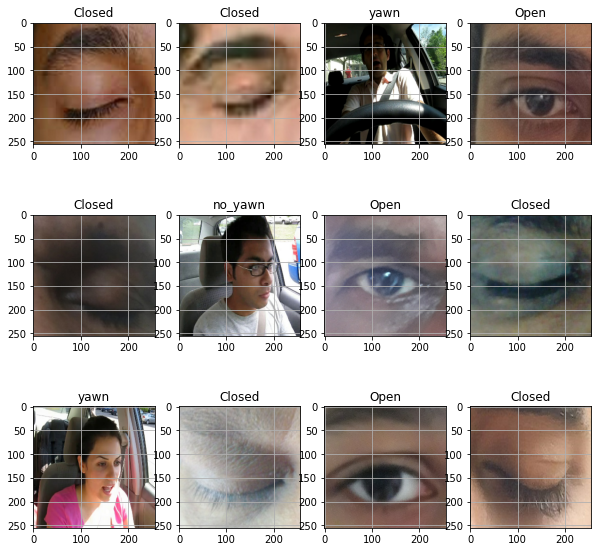

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [9]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
## lets define our CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),

  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [11]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 5)

Epoch 1/5
62/62 [==============================] - 140s 2s/step - loss: 1.1956 - accuracy: 0.3446 - val_loss: 0.7829 - val_accuracy: 0.5312
Epoch 2/5
62/62 [==============================] - 133s 2s/step - loss: 0.7453 - accuracy: 0.5492 - val_loss: 0.7696 - val_accuracy: 0.5427
Epoch 3/5
62/62 [==============================] - 153s 2s/step - loss: 0.7234 - accuracy: 0.5667 - val_loss: 0.7681 - val_accuracy: 0.5473
Epoch 4/5
62/62 [==============================] - 160s 3s/step - loss: 0.7086 - accuracy: 0.5781 - val_loss: 0.7399 - val_accuracy: 0.5589
Epoch 5/5
62/62 [==============================] - 165s 3s/step - loss: 0.6955 - accuracy: 0.5960 - val_loss: 0.7189 - val_accuracy: 0.5774


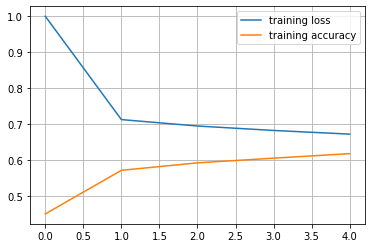

In [13]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [14]:
# saving model
MyCnn.save('drowsiness-stage1.h5')

In [15]:
#########################################
# improving our model                   #
#########################################


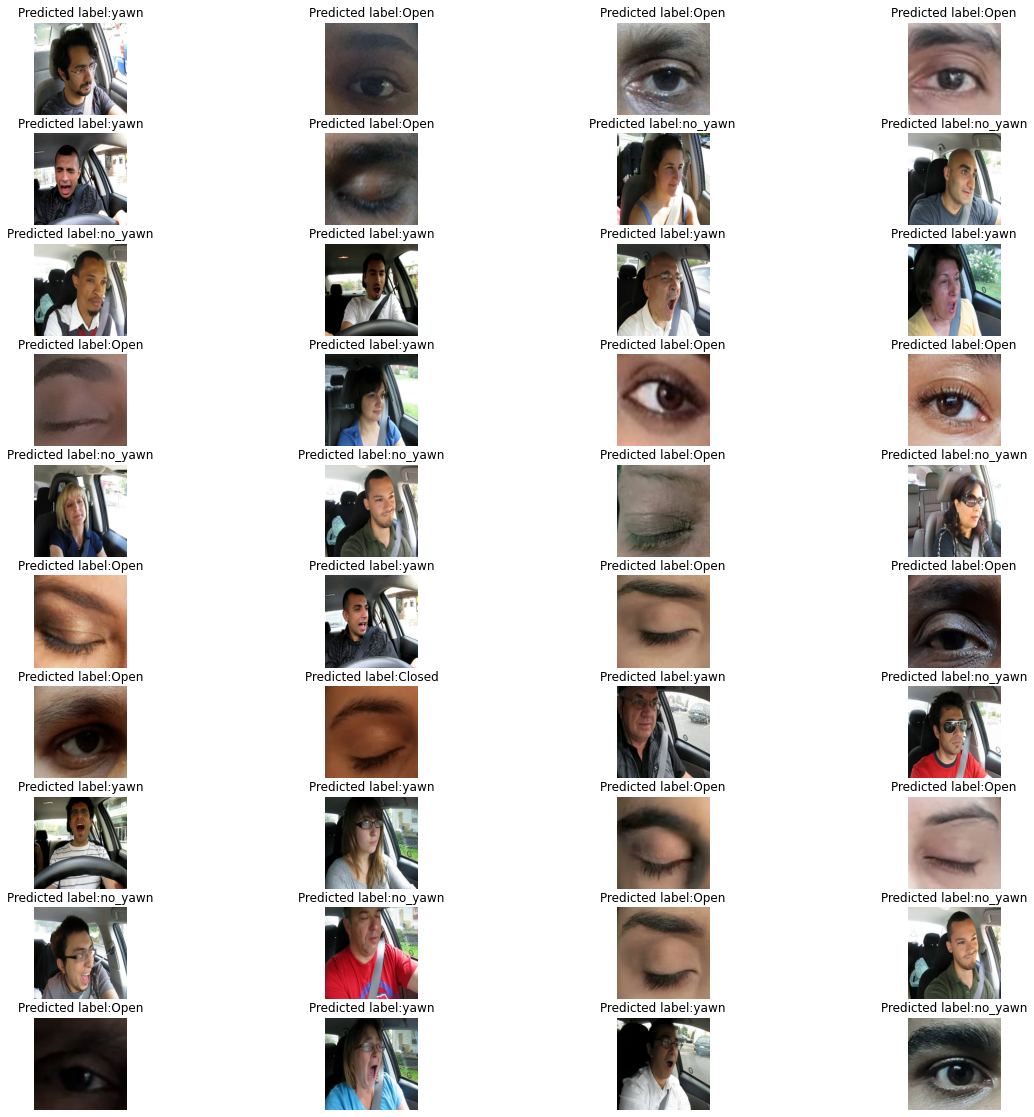

In [16]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)